In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor  
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

In [35]:
import graphviz
from IPython.display import SVG
from IPython.display import display

In [14]:
df = pd.read_csv('train.csv')

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [17]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [19]:
df['month'] = df.datetime.dt.month
df['dayofweek'] = df.datetime.dt.dayofweek
df['hour'] = df.datetime.dt.hour
df['year'] = df.datetime.dt.year
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,dayofweek,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4,0


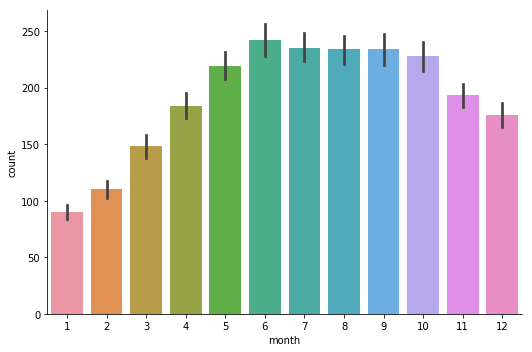

In [20]:
sns.catplot(x="month",y="count",data=df,kind='bar',height=5,aspect=1.5)

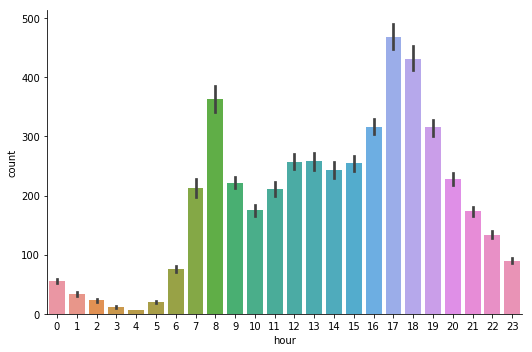

In [21]:
sns.catplot(x="hour",y="count",data=df,kind='bar',height=5,aspect=1.5)

Арендуют больше в 8 часов и с 16 до 19. 

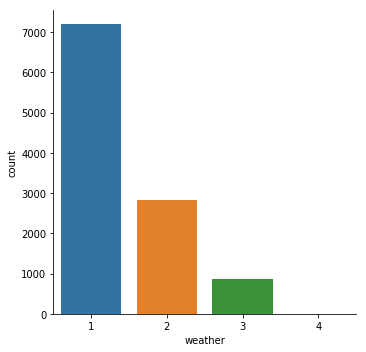

In [22]:
sns.catplot(x='weather',data=df,kind='count',height=5,aspect=1)  

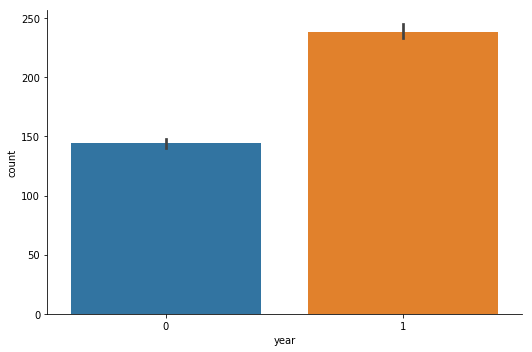

In [23]:
sns.catplot(x="year",y="count",data=df,kind='bar',height=5,aspect=1.5)

0 это 2011, а 1 это 2012. Аренда увеличилась

Разобьем температуру на интервалы с шагом 5. Здесь видно, что максимум достигается в 6(30-35 градусов) и 7(35-40) столбцах

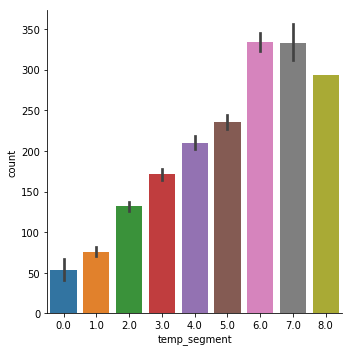

In [25]:
new_df=df.copy()
new_df['temp_segment']=np.floor(new_df['temp'])//5
new_df['temp_segment'].unique()

sns.catplot(x="temp_segment",y="count",data=new_df,kind='bar')

# Собираем дерево с тем, что есть

In [26]:
X = df.drop(['casual', 'registered', 'count', 'datetime'], axis=1)  
y = df['count']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [27]:
regressor = DecisionTreeRegressor(random_state=1)  
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [28]:
y_pred = regressor.predict(X_test)  
comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
comparison.head(10)

,Actual,Predicted
3709,308,421.0
6741,14,2.0
9848,539,501.0
1410,143,142.0
10672,1,3.0
2999,250,241.0
1433,76,38.0
9129,482,676.0
7446,259,256.0
4523,167,179.0


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 34.191000918273645
Mean Squared Error: 3208.862258953168
Root Mean Squared Error: 56.64682037813921


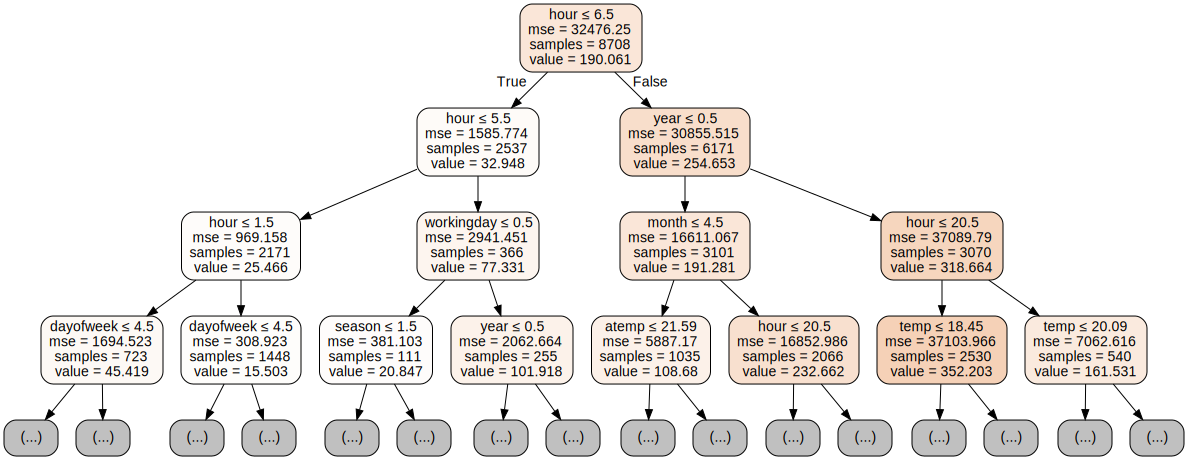

In [36]:
feats = X_train.columns
data = tree.export_graphviz(regressor, out_file=None, feature_names=feats,
                           class_names=['count'], filled=True,
                           rounded=True, special_characters=True,
                           max_depth=3)
graph = graphviz.Source(data)
display(SVG(graph.pipe(format='svg')))

# Попытка улучшить

Разделим сезоны(добавим фичей)

In [37]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,dayofweek,hour,year,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4,0,1,0,0,0


In [38]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.drop(['season','weather', 'datetime'],inplace=True,axis=1)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,month,...,hour,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,2,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,3,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,4,0,1,0,0,0,1,0,0,0


In [70]:
X = df.drop(['casual', 'registered', 'count'], axis=1)  
y = df['count']  
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,month,dayofweek,hour,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,1,5,0,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,1,5,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,1,5,2,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,1,5,3,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,5,4,0,1,0,0,0,1,0,0,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)  

regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
comparison.head(10)

,Actual,Predicted
3709,308,421.0
6741,14,2.0
9848,539,593.0
1410,143,142.0
10672,1,3.0
2999,250,232.0
1433,76,38.0
9129,482,676.0
7446,259,256.0
4523,167,161.0


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 34.23347107438016
Mean Squared Error: 3413.546028466483
Root Mean Squared Error: 58.425559718897716


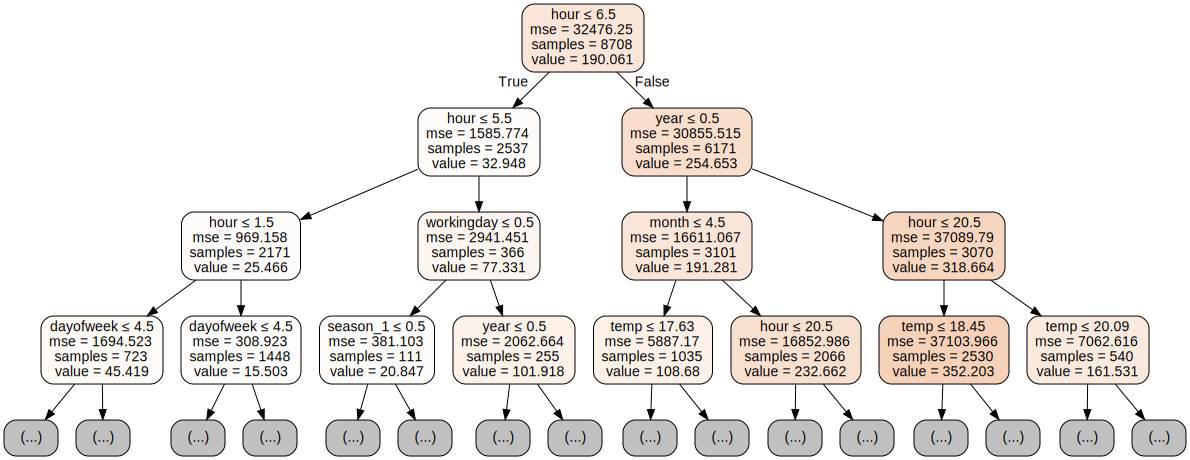

In [47]:
feats = X_train.columns
data = tree.export_graphviz(regressor, out_file=None, feature_names=feats,
                           class_names=['count'], filled=True,
                           rounded=True, special_characters=True,
                           max_depth=3)
graph = graphviz.Source(data)
display(SVG(graph.pipe(format='svg')))

# Улучшить не удалось! Новые фичи не помогли

# А если выкинуть влажность, ощущение температуры

In [73]:
X = X.drop(['atemp', 'humidity'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)  

regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
comparison.head(10)

,Actual,Predicted
3709,308,198.0
6741,14,2.0
9848,539,671.0
1410,143,141.0
10672,1,16.0
2999,250,241.0
1433,76,38.0
9129,482,554.0
7446,259,274.0
4523,167,161.0


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 35.41942148760331
Mean Squared Error: 4062.345844811754
Root Mean Squared Error: 63.73653461564846


In [76]:
# Снова не улучшилось